In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from func_model_performance import test_darts_impl, test_tensorflow_impl

np.set_printoptions(precision = 4)

In [36]:
pathes_household = {"gas": "./data/Generated Data/master_competitor_market_prices_gas.csv", 
                    "power": "./data/Generated Data/master_competitor_market_prices_power.csv"}
pathes_market = {"gas": "./data/Generated Data/gas_prices.csv", 
                 "power": "./data/Generated Data/power_prices.csv"}

In [37]:
energy = "power"

path_household = pathes_household[energy]
path_market = pathes_market[energy]

dtypes = {"date_valid_from": str, "date_valid_to": str, "consumption_range_kwh": np.int32, "price_year_eur": np.float64, "post_code": str, "rank": np.float16}
usecols = [name for name, _ in dtypes.items()]

household = pd.read_csv(path_household, usecols=usecols, dtype = dtypes)
market_data = pd.read_csv(path_market, header = [0], parse_dates=["Dates"])

market_data.set_index("Dates", inplace = True)
market_data["moving_average"] = market_data.avg_price.ewm(alpha=0.1, adjust=False).mean()
household["price_kwh"] = household["price_year_eur"]/household["consumption_range_kwh"]
household["date_valid_from"] = pd.to_datetime(household["date_valid_from"])
household["date_valid_to"] = pd.to_datetime(household["date_valid_to"])

postCodes = household.post_code.unique()
consRanges = household.consumption_range_kwh.unique()

In [50]:
shift = 14
input_width = 1
rank_range = (6,10)
consRanges_test_models = consRanges[(consRanges<=5000) & (consRanges>=3500)]
postCodes_test_models = np.random.choice(postCodes, 5)

print("Consumption Ranges:", consRanges_test_models)
print("Post Codes:", postCodes_test_models)
print(f"{np.count_nonzero(consRanges_test_models)*np.count_nonzero(postCodes_test_models)} calculations to be done")

Consumption Ranges: [3500 4000 4500 5000 4250 3600]
Post Codes: ['48161' '89075' '19061' '60439' '6110']
30 calculations to be done


In [ ]:

mse_darts_df, mape_darts_df = test_darts_impl(shift = shift, 
                                consRanges=consRanges_test_models, 
                                postCodes=postCodes_test_models,
                                household_data=household,
                                market_data=market_data,
                                rank_range=rank_range)


In [52]:

mse_tensorflow_df, mape_tensorflow_df = test_tensorflow_impl(shift = shift, 
                                input_width=input_width, 
                                consRanges=consRanges_test_models, 
                                postCodes=postCodes_test_models,
                                rank_range=rank_range,
                                household_data=household,
                                market_data=market_data)


48161 3500; 48161 4000; 48161 4500; 48161 5000; 48161 4250; 48161 3600; 89075 3500; 89075 4000; 89075 4500; 89075 5000; 89075 4250; 89075 3600; 19061 3500; 19061 4000; 19061 4500; 19061 5000; 19061 4250; 19061 3600; 60439 3500; 60439 4000; 60439 4500; 60439 5000; 60439 4250; 60439 3600; 6110 3500; 6110 4000; 6110 4500; 6110 5000; 6110 4250; 6110 3600; 

In [53]:
mape_tensorflow_df

,baseline,dense,convolutional,LSTM
"(48161, 3500)",37.612789,20.290190,4.943347,63.613777
"(48161, 4000)",38.930401,26.355387,9.606276,54.737110
"(48161, 4500)",34.640739,20.819067,66.276505,37.628464
"(48161, 5000)",25.353785,32.144032,14.063940,60.970638
"(48161, 4250)",37.869633,16.770876,16.582804,53.098591
"(48161, 3600)",33.415142,17.843275,7.101686,68.395111
"(89075, 3500)",39.353909,19.080790,8.265473,51.764233
"(89075, 4000)",31.302357,38.711567,35.550156,71.420570
"(89075, 4500)",42.579906,19.908884,14.353227,58.544010
"(89075, 5000)",34.385761,26.062611,11.712533,63.941639


In [54]:
mape_tensorflow_df.describe()

,baseline,dense,convolutional,LSTM
count,30.000000,30.000000,30.000000,30.000000
mean,36.134374,28.419646,17.891990,60.318447
std,4.404226,15.656760,15.245488,9.426220
min,25.353785,13.491043,4.369777,37.628464
25%,33.832020,19.859749,8.779778,54.767858
50%,36.032396,24.307600,14.211565,60.705662
75%,38.433234,31.179188,19.808193,64.953531
max,46.313770,97.282921,66.597656,79.592674


In [55]:
mape_darts_df.describe()

,baseline,LSTM,regression
count,30.000000,30.000000,30.000000
mean,5.571412,34.323691,3.823161
std,2.112817,2.696019,0.804641
min,2.206938,29.598077,2.873454
25%,3.769768,32.829139,3.329003
50%,6.368918,34.654888,3.644340
75%,7.470616,36.372411,4.185836
max,8.600329,38.491749,5.933512


In [56]:
mse_tensorflow_df.describe()

,baseline,dense,convolutional,LSTM
count,30.000000,30.000000,30.000000,30.000000
mean,0.070069,0.461840,0.254781,1.597615
std,0.023139,0.699877,0.473286,0.469539
min,0.038548,0.100305,0.018437,0.660898
25%,0.052226,0.186147,0.048779,1.289463
50%,0.065885,0.270720,0.106054,1.613033
75%,0.081368,0.468913,0.182787,1.800002
max,0.122108,3.977590,1.954744,2.720411


In [57]:
mse_darts_df.describe()

,baseline,LSTM,regression
count,30.000000,30.000000,30.000000
mean,0.003942,0.054238,0.002434
std,0.002393,0.007243,0.000668
min,0.000853,0.041688,0.001655
25%,0.001702,0.048723,0.001986
50%,0.004030,0.053474,0.002193
75%,0.005807,0.057675,0.002721
max,0.008091,0.068532,0.004219


In [58]:
mse = {"tensorflow": mse_tensorflow_df, "darts": mse_darts_df}
mape = {"tensorflow": mape_tensorflow_df, "darts": mape_darts_df}
mse_df = pd.concat(mse.values(), axis = 1, keys = mse.keys())
mape_df = pd.concat(mape.values(), axis = 1, keys = mape.keys())

In [59]:
mse_df.to_csv("./data/mse_models.csv")
mape_df.to_csv("./data/mape_models.csv")

([<matplotlib.axis.XTick at 0x7fe8d9410790>,
 [Text(0, 0, "('tensorflow', 'baseline')"),
  Text(1, 0, "('tensorflow', 'dense')"),
  Text(2, 0, "('tensorflow', 'convolutional')"),
  Text(3, 0, "('tensorflow', 'LSTM')"),
  Text(4, 0, "('darts', 'baseline')"),
  Text(5, 0, "('darts', 'LSTM')"),
  Text(6, 0, "('darts', 'regression')")])

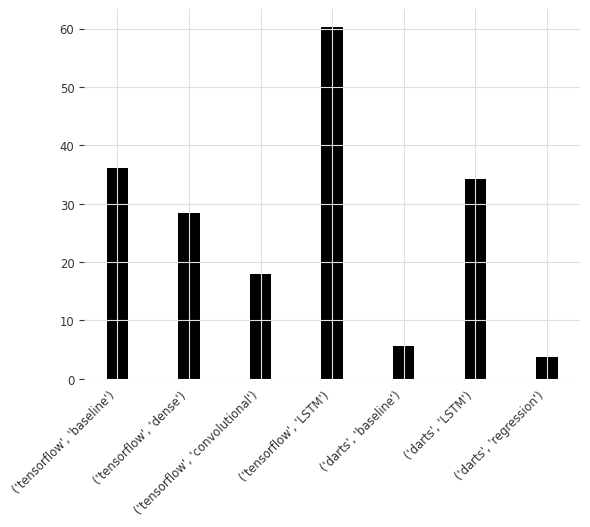

In [60]:
data = mape_df.mean()
x = np.arange(len(mape_df.columns))
width = 0.3
#plt.bar(mape_df.mean())
plt.bar(x, data , width, label='Model Performance')
plt.xticks(ticks=x, labels=data.index,
           rotation=45, ha = "right")